In [62]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import bilby
import glob
%matplotlib inline
import pandas as pd
import os
# bilby.result.read_in_result(filename = jsonpath)

In [71]:
Rate = 30  #    from R = 320^{+490}_{−240} Gpc^{-3} yr^{-1} 
duration_year = 10
zmax = 0.5
dc_max  = bilby.gw.conversion.redshift_to_comoving_distance(zmax) * 1e-3
Vc_max = 4./3 * np.pi * dc_max**3
NperYear = Vc_max * Rate  ## per year
priors = bilby.gw.prior.BBHPriorDict("prior.prior")
start_time = 1388102418
end_time   = start_time + duration_year * (365*24*3600)
samples = priors.sample(int(NperYear* duration_year))
times = np.random.uniform(start_time, end_time, len(samples['ra']))
samples['geocent_time'] = np.sort(times)
delta_t = list(samples['geocent_time'][1:] - samples['geocent_time'][:-1])
delta_t.append(delta_t[0])
delta_t = np.array(delta_t)
samples['delta_t'] = delta_t

In [72]:
df = pd.DataFrame.from_dict(samples)
df.to_csv("bbh_population_10_years.csv")

Text(0.5, 0, '$\\Delta t$ [days]')

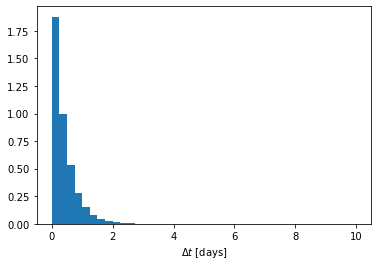

In [60]:
plt.hist(delta_t/(3600*24), 40, range= (0,10), density=True);
plt.xlabel(r'$\Delta t$ [days]' )

In [65]:
delta_t

array([18479.05862498, 44425.43971181, 53726.52479315, ...,
       47165.04791641, 14489.93104172, 17784.55064774])